# Exploratory Data Analysis: MPG Data

## Background

One of the best parts of Python data science libraries is the built-in
datasets. Seaborn, Keras, and Scikit-Learn all have wonderful datasets for
EDA and machine learning.

Today, I want to look through the `mpg` dataset from seaborn. While there is
no description of the data on Seaborn's [data repository][1], there is a
detailed description from the source page on [UCI][2]:

> **Auto MPG**
> 
> This dataset is a slightly modified version of the dataset provided in the
> StatLib library. In line with the use by Ross Quinlan (1993) in predicting
> the attribute "mpg", 8 of the original instances were removed because they
> had unknown values for the "mpg" attribute. The original dataset is
> available in the file "auto-mpg.data-original".
>
> "The data concerns city-cycle fuel consumption in miles per gallon, to be
> predicted in terms of 3 multivalued discrete and 5 continuous attributes."
> (Quinlan, 1993)

The metadata for this dataset is as follows:

| Index | Column       | Type                              |
| ----- | ------------ | --------------------------------- |
|     1 | mpg          | continuous                        |
|     2 | cylinders    | multi-valued discrete             |
|     3 | displacement | continuous                        |
|     4 | horsepower   | continuous                        |
|     5 | weight       | continuous                        |
|     6 | acceleration | continuous                        |
|     7 | model year   | multi-valued discrete             |
|     8 | origin       | multi-valued discrete             |
|     9 | car name     | string (unique for each instance) |

[1]: https://github.com/mwaskom/seaborn-data
[2]: https://archive.ics.uci.edu/dataset/9/auto+mpg

## Objective

The objective of this project is to perform an exploratory data analysis (EDA)
Seaborn's MPG dataset to better understand the underlying data. As part of
this, I hope to uncover patterns/relationships between different features
(e.g., weight, horsepower, origin) and fuel efficiency (miles per gallon, or
mpg).

## Setup

In [2]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame shorthand for type hints
DF = pd.DataFrame

## Load & Investigate Data

In [3]:
mpg_raw = sns.load_dataset('mpg')
mpg_raw.info()
mpg_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Initial impressions:

1. I almost missed this, but the `horsepower` field has 392 non-null values,
   but the total row count is 398: we have 6 null values in this column.
2. Within the numeric columns, we have a mix of float & integer fields. 
   1. As mentiond above, the `cylinders` and `model_year` columns are discrete;
      the rest are continuous.
   2. While the `weight` column is labelled as continuous in the metadata, it
      looks like they only had whole-number values for this field.
3. The `origin` and `name` columns are string values, but it looks like
   `origin` may be a fixed-number of unique values (i.e., categorical).
4. The `model_year` column looks like it is a 2-digit year in the 1900s. In
   other words, it looks like they are representing the year 1970 as the value
   `70`. However, we should definitely confirm this, since this would cause
   problems if the dataset included cars from the 2000's.

### Makes & Models

It would be interesting to see how these vehicle stats compare across
makers. Let's try to pull that information out.

In [4]:
# Extract name as first word in 'name'
car_makes = mpg_raw['name'].map(lambda name: name.split()[0])
car_makes.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

Looks like we have a few errors... for example, Chevrolet also shows up 
misspelled as 'chevroelt' and shortened as 'chevy'.

In [5]:
# Map car makes to the correct name
def clean_car_make(make: str) -> str:
    acronyms = ['amc', 'bmw']
    car_makes_map = {
        'chevroelt':  'chevrolet',
        'chevy':      'chevrolet',
        'vokswagen':  'volkswagen',
        'vw':         'volkswagen',
        'hi':         'harvester',
        'maxda':      'mazda',
        'toyouta':    'toyota',
        'mercedes':   'mercedes-benz',
    }
    make = car_makes_map.get(make, make)
    return make.upper() if make in acronyms else make.title()


car_makes.map(clean_car_make).unique()

array(['Chevrolet', 'Buick', 'Plymouth', 'AMC', 'Ford', 'Pontiac',
       'Dodge', 'Toyota', 'Datsun', 'Volkswagen', 'Peugeot', 'Audi',
       'Saab', 'BMW', 'Harvester', 'Mercury', 'Opel', 'Fiat',
       'Oldsmobile', 'Chrysler', 'Mazda', 'Volvo', 'Renault', 'Honda',
       'Subaru', 'Capri', 'Mercedes-Benz', 'Cadillac', 'Triumph',
       'Nissan'], dtype=object)

### Origins

Let's take a further look at the `origin` column. My guess is that it is a
categorical column, but let's see how this is distributed amongst its values:

In [6]:
mpg_raw['origin'].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

Looks like most of these are USA-made, but we also have some from Japan and
Europe, too. This is certainly a categorical field.

While the goal of this notebook is not to perform predictive analytics, these
columns could be a useful feature in predicting `mpg`. One-hot encoding would
be a simple way to express these values, just adding 3 columns for each origin,
coding them `1` if the car is from that origin. That way, we can still make use
of it in an ML model, which doesn't work well directly using string values.

### Model Year

Let's determine if `model_year` is really prefixed by either 19xx or 20xx.

In [7]:
mpg_raw['model_year'].value_counts(sort=False)

model_year
70    29
71    28
72    28
73    40
74    27
75    30
76    34
77    28
78    36
79    29
80    29
81    29
82    31
Name: count, dtype: int64

In [8]:
print('First model year:    ', mpg_raw['model_year'].min())
print('Latest model year:   ', mpg_raw['model_year'].max())

First model year:     70
Latest model year:    82


Looks like we have nothing to worry about then! Everything is between
70 - 82, which from context must mean 1970 - 1982.

## Data Cleaning

Before starting the analysis, I do want to make a few changes to the data,
primarily:

- Breaking-up `name` into `make` and `model`.
- Changing `model_year` to full 4-year value.

For the most part, the rest of the data looks pretty well-maintained.

### Pipeline Functions

While I'm a big fan of object-oriented programming, I love using functional
programming methods when performing data transformations. Using the Pandas
`DataFrame.pipe()` method lets us create abstraction & reusability in our
code, while still providing clarity on the steps taken in the transformation
(assuming we clearly name our functions).

Below, I'm going to define a couple of the methods used in the transformation.
While it doesn't necessarily shorten the code, it definitely makes for a
cleaner final result. Plus, I have the chance to pull these functions out into
a separate module if I have a need to reuse them.

In [9]:
def split_name_into_make_and_model(df: DF) -> DF:
    '''Replace the name with the make/model.'''
    make = df['name'].map(lambda name: name.split()[0])
    model = df['name'].map(lambda name: ' '.join(name.split()[1:]))
    make = make.map(clean_car_make)
    model = model.map(str.title)

    df = df.drop('name', axis=1)
    df['make'] = make
    df['model'] = model
    return df

In [10]:
def convert_to_full_year(df: DF) -> DF:
    '''Convert 2-digit years to 4-digit.'''
    min_year = df['model_year'].min()
    assert min_year >= 40, f'Expected no 2000s cars, found min year {min_year}'

    df = df.copy()
    df['model_year'] += 1900
    return df

### Execute pipeline

In [11]:
mpg = mpg_raw.copy()
mpg = mpg.pipe(split_name_into_make_and_model) \
         .pipe(convert_to_full_year)

mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,make,model
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,Chevrolet,Chevelle Malibu
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,Buick,Skylark 320
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,Plymouth,Satellite
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,AMC,Rebel Sst
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,Ford,Torino


## Visualizations

Now let's explore this dataset more visually, starting with some basic
descriptive (univariate) statistics, then seeing how the features correlate.

### Descriptive Statistics

Let's dive into each of the features to understand their distributions. The
goal here is to see their central tendency, spread, and hopefully catch any
anomalies.

In [12]:
def plot_dist(df: pd.DataFrame, column: str) -> None:
    data = df[column]
    fig, (ax_upper, ax_lower) = plt.subplots(figsize=(5,4),
                                             nrows=2,
                                             ncols=1,
                                             sharex=True,
                                             height_ratios=[1,9])

    # Top plot: boxplot & scatter
    sns.boxplot(x=data, ax=ax_upper, color='#eee', linecolor='#aaa')
    ax_upper.set_axis_off()

    # Bottom plot: KDE
    sns.kdeplot(x=data, ax=ax_lower, color='dodgerblue', fill='lightsteelblue')

    # V-lines around 95% confidence interval
    mu, sigma = data.mean(), data.std()
    xmin, xmax = (mu - sigma), (mu + sigma)
    ymax = ax_lower.get_ylim()[1]
    labels = [r'$- \sigma$', r'$\mu$', r'$+ \sigma$']
    x_vals = [xmin, mu, xmax]
    ax_lower.vlines(x_vals, ymin=0, ymax=(0.95 * ymax), color='#aaa', ls='--')
    for x, lbl in zip(x_vals, labels):
        ax_lower.text(x=x, y=ymax, s=lbl, color='#333', ha='center')

    # Formatting
    ax_lower.set_xlabel(None)
    ax_lower.set_ylabel(None)
    ax_lower.yaxis.set_visible(False)
    ax_lower.spines.top.set_visible(False)
    ax_lower.spines.left.set_visible(False)
    ax_lower.spines.right.set_visible(False)
    ax_lower.spines.bottom.set(color='#ccc')
    ax_lower.tick_params(axis='x', color='#666', labelcolor='#333')
    fig.suptitle(column)
    fig.tight_layout()

    plt.show()
    return

#### MPG

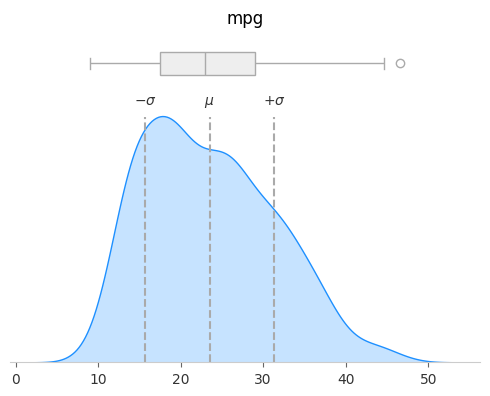

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.5,23.0,29.0,46.6


In [17]:
plot_dist(mpg, 'mpg')
mpg[['mpg']].describe().T

Looks like there may be a few modes here, certainly some that are peaking just
below the mean, but there may be 2 more.

#### Displacement

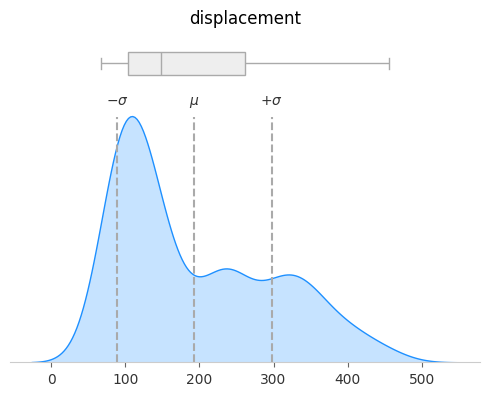

,count,mean,std,min,25%,50%,75%,max
displacement,398.0,193.425879,104.269838,68.0,104.25,148.5,262.0,455.0


In [18]:
column = 'displacement'
plot_dist(mpg, column)
mpg[[column]].describe().T

This plot definitely shows some multi-modality. It looks like lower
displacement is favored, around 110, but there is also modes centered at
around 240 and 325.

I wonder if this has anything to do with the origin?

#### Horsepower

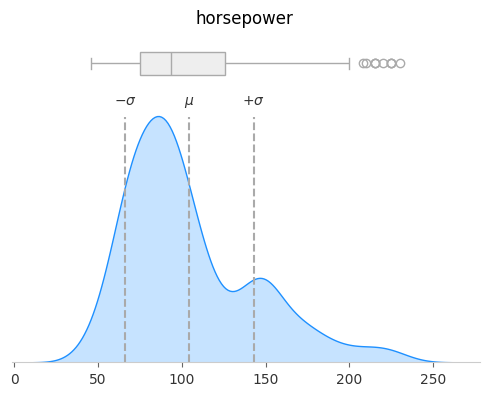

,count,mean,std,min,25%,50%,75%,max
horsepower,392.0,104.469388,38.49116,46.0,75.0,93.5,126.0,230.0


In [19]:
column = 'horsepower'
plot_dist(mpg, column)
mpg[[column]].describe().T

This one almost looks bi-modal, with the largest peak at about 90, another
smaller peak at 150, but there could be a peak at about 225. There definitely
seems to be some outliers in that area.

#### Weight

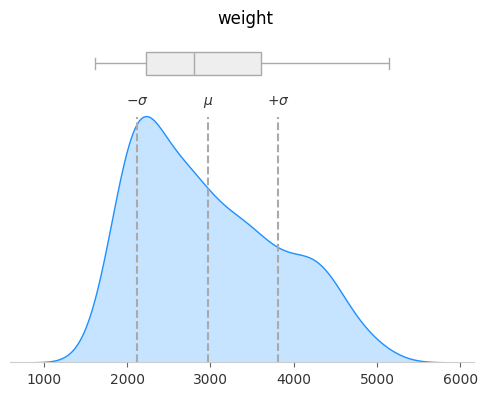

,count,mean,std,min,25%,50%,75%,max
weight,398.0,2970.424623,846.841774,1613.0,2223.75,2803.5,3608.0,5140.0


In [20]:
column = 'weight'
plot_dist(mpg, column)
mpg[[column]].describe().T

Looks like most around 2200 lbs, starts to decrease until another peak at 
4200

### Bivariate Distributions

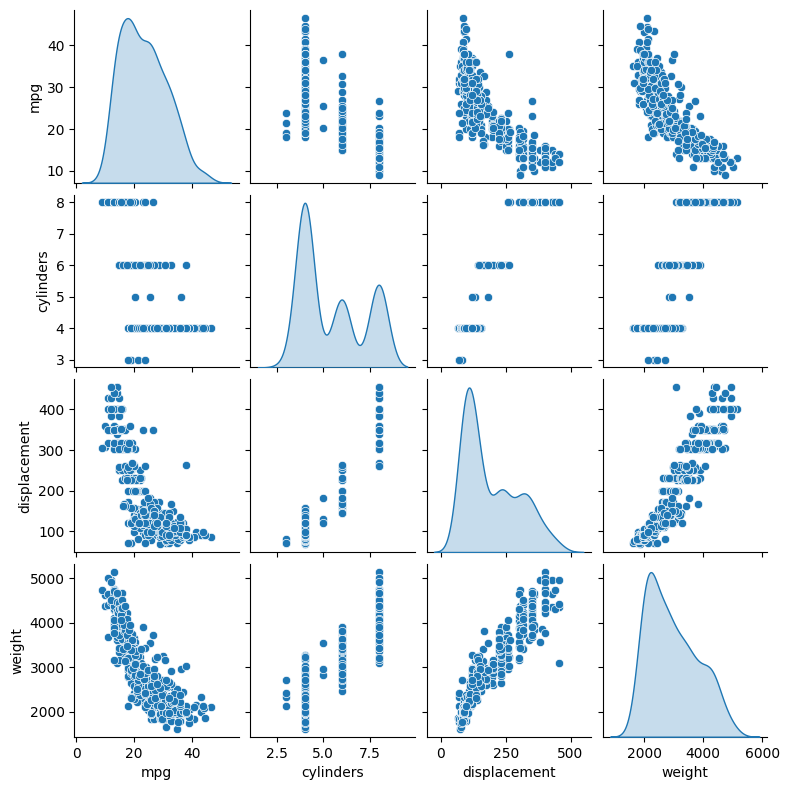

In [28]:
mpg_numeric = mpg[['mpg', 'cylinders', 'displacement', 'weight']]

sns.pairplot(mpg_numeric, diag_kind='kde', height=2.0)
plt.show()

Immediately notice a few things:

1. There's some strong correlations here between MPG/displacement/weight.
2. MPG seems to decrease exponentially as weight increases.
3. MPG seems to increase rapidly with displacement, trending linearly long-term.
4. MPG and weight seem to have right-skewed distributions.
5. Cylinders and displacement seem to have multi-modal distributions.

### Origin's effect on MPG

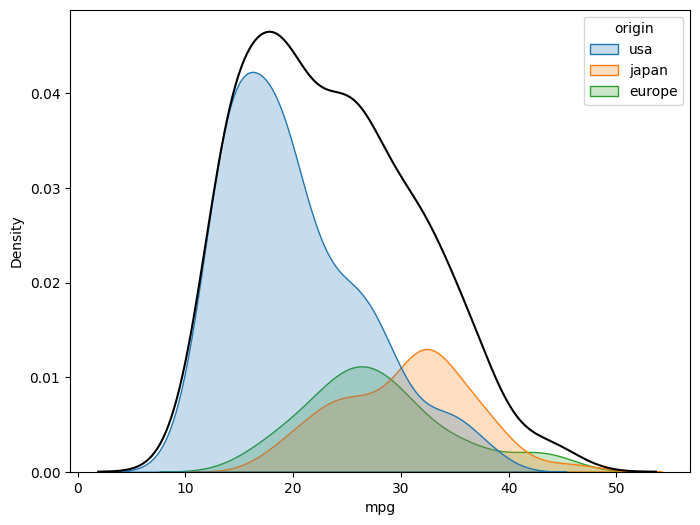

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(mpg, x='mpg', hue='origin', ax=ax, fill=True)
sns.kdeplot(mpg, x='mpg', ax=ax, fill=False, color='black', label='total')
plt.show()

There's certainly a lot more USA-made cars in this dataset. However, the
fuel efficiency tends to be lower: Japan tends to prefer higher-MPG cars,
USA in the middle, and Europe somewhere in the middle.

### Fuel Efficiency Over Time

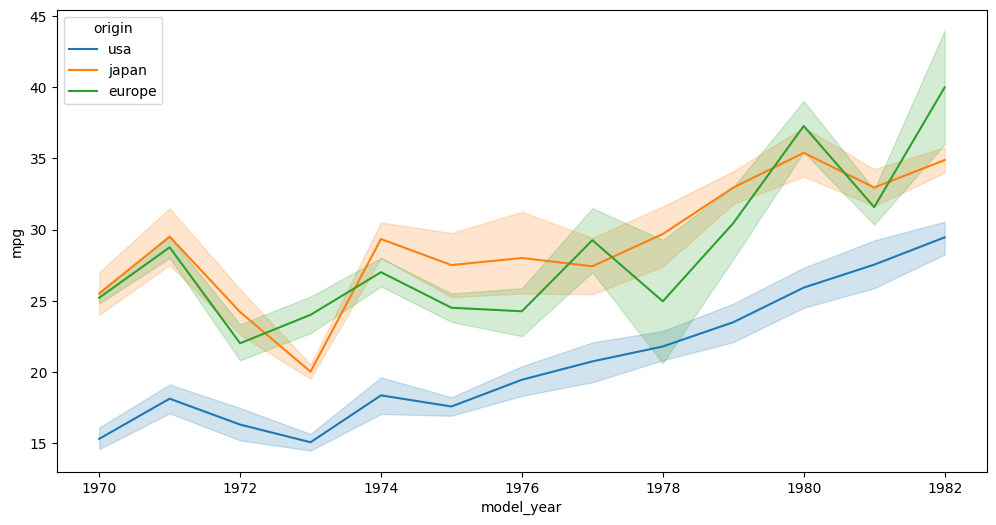

In [36]:
fig, ax = plt.subplots(figsize=(12,6))

sns.lineplot(mpg,
             ax=ax,
             x='model_year',
             y='mpg',
             hue='origin',
             errorbar=('ci', 69.1))   # Plot +/- 0.5 sigma
plt.show()